In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [67]:
# Load the dataset
data = pd.read_csv('dataset.csv')


In [68]:
# Preprocess the data
X = data.drop(columns=['Churn'])  # Features
y = data['Churn']  # Target variable


In [69]:
data.head()

,call_failure,complains,subscription_length,charge_amount,seconds_of_use,frequency_of_use,frequency_of_sms,distinct_called_numbers,age_group,tariff_plan,status,age,customer_value,FN,FP,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,177.8760,69.7640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,41.4315,60.0000,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,1382.8680,203.6520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,216.0180,74.0020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,131.2245,64.5805,0


In [70]:
print(X)

     call_failure  complains  subscription_length  charge_amount  \
0               8          0                   38              0   
1               0          0                   39              0   
2              10          0                   37              0   
3              10          0                   38              0   
4               3          0                   38              0   
..            ...        ...                  ...            ...   
160             7          0                   42              1   
161            10          0                   42              0   
162            26          0                   42              4   
163             5          0                   42              2   
164            10          0                   41              1   

     seconds_of_use  frequency_of_use  frequency_of_sms  \
0              4370                71                 5   
1               318                 5                 7   
2     

In [71]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
160    0
161    0
162    0
163    0
164    0
Name: Churn, Length: 165, dtype: int64


In [72]:
data.isnull().sum()

call_failure               0
complains                  0
subscription_length        0
charge_amount              0
seconds_of_use             0
frequency_of_use           0
frequency_of_sms           0
distinct_called_numbers    0
age_group                  0
tariff_plan                0
status                     0
age                        0
customer_value             0
FN                         0
FP                         0
Churn                      0
dtype: int64

In [94]:
print(data['Churn'].value_counts() )

Churn
0    138
1     27
Name: count, dtype: int64


In [95]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state= 2)


In [96]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [97]:
# Initialize the logistic regression model
model = LogisticRegression()


In [98]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [99]:
# Predict on the test set
y_pred = model.predict(X_test)

In [100]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


c:\Users\shubh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\shubh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\shubh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [101]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9411764705882353
Confusion Matrix:
 [[16  0]
 [ 1  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       0.00      0.00      0.00         1

    accuracy                           0.94        17
   macro avg       0.47      0.50      0.48        17
weighted avg       0.89      0.94      0.91        17



In [102]:
training_data_pridiction = model.predict(X_train)
# Predict on the treaning set

In [103]:
# r squerd error
error_score = metrics.r2_score(y_train, training_data_pridiction)

print("R squer erroe",error_score)

R squer erroe 0.30012610340479207


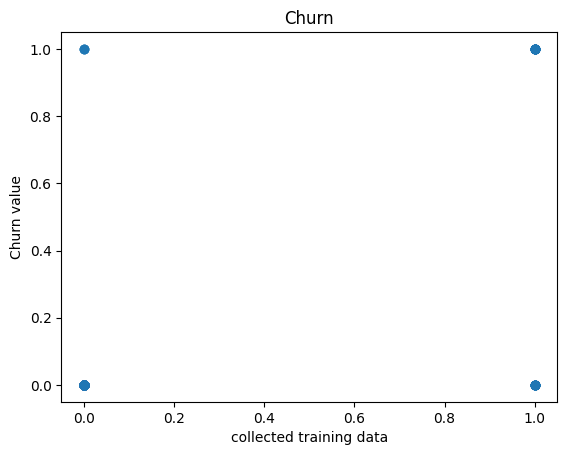

In [104]:
plt.scatter(y_train, training_data_pridiction)
plt.xlabel("collected training data")
plt.ylabel("Churn value")
plt.title("Churn")
plt.show()

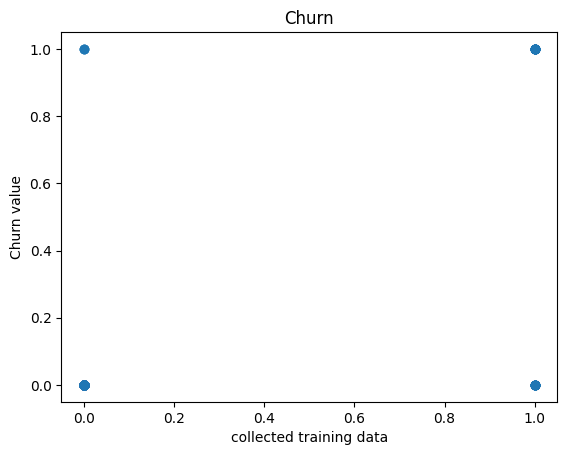

In [108]:
def show():
    plt.scatter(y_train, training_data_pridiction)
    plt.xlabel("collected training data")
    plt.ylabel("Churn value")
    plt.title("Churn")
    plt.show()
show()

In [105]:
#pridiction on training set data
test_data_pridiction = model.predict(X_test)

In [106]:
# r squerd error
error_score = metrics.r2_score(y_test, test_data_pridiction)
print("R squer erroe",error_score)

R squer erroe -0.0625


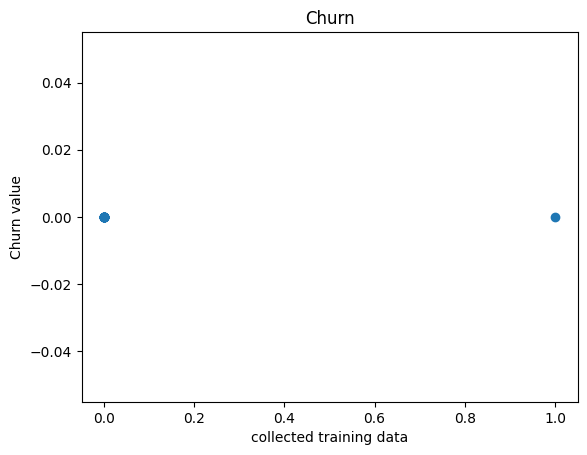

In [107]:
plt.scatter(y_test, test_data_pridiction)
plt.xlabel("collected training data")
plt.ylabel("Churn value")
plt.title("Churn")
plt.show()